In [13]:
function u!(h,f,c,v0,d,t0,t)
    return h*cos(f) + c*sin(f) + v0 + d*(t-t0)
end;

In [14]:
function h(K,omega)
    return K*cos(omega)
end;

function c(K, omega)
    return -K*sin(omega)
end;

function v0(gamma, K, e, omega)
    return gamma + K*e*cos(omega)
end;
    

In [15]:
K = 5
omega = pi/4
d = 1
gamma = 1
e = 0.1
Beta = [h(K,omega) c(K,omega) v0(gamma, K, e, omega)]

1x3 Array{Float64,2}:
 3.53553  -3.53553  1.35355

In [16]:
function chi2(v, u, sigma)
    return (v - u)^2 / sigma^2
end;

In [41]:
# Add ExoJulia/ to path
push!(LOAD_PATH, "../../../ExoJulia")
using ExoJulia
using PyPlot
using DataFrames

INFO: Precompiling module DataFrames...


In [45]:
data =  readtable("mystery_planet.txt", separator = ' ', header=false)

,x1,x2,x3
1,13933.82196,-217.7,1.0
2,13933.82264,-221.0,1.0
3,13933.82336,-217.8,1.0
4,14085.16632,-203.3,1.3
5,14085.16702,-204.2,1.3
6,14085.16775,-203.6,1.2
7,14130.12242,321.0,1.1
8,14130.12308,318.4,1.1
9,14130.12372,319.2,1.1
10,14131.11653,290.6,1.2


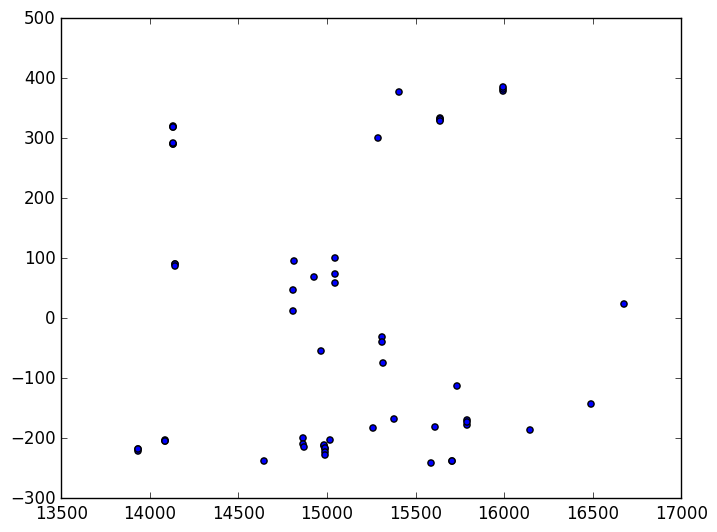

PyObject <matplotlib.collections.PathCollection object at 0x32452f550>

In [50]:
time = data[1];
rv = data[2];
err = data[3];


scatter(time, rv)

In [127]:
plist = []
tlist = []

P = linspace(100, 300, 10000)

min = 0
for pp in P
    sum = 0
    data2 = hcat(data, [mod(data[1],pp)])
    data2 = sort(data2, cols=[order(:x1_1)])
    for i=2:length(data2[2])
        
        sum += (data2[2][i] - data2[2][i-1])^2
    end
    push!(plist, sum)

end



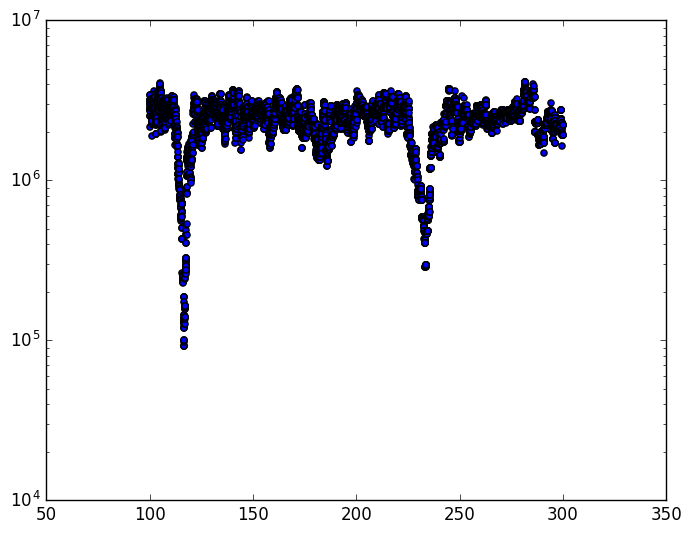

In [115]:
data2 = hcat(data, [mod(data[1],5)])
data2 = sort(data2, cols=[order(:x1_1)])

,x1,x2,x3,x1_1
1,14865.09274,-199.3,1.2,0.0927400000000489
2,14130.12242,321.0,1.1,0.12241999999969266
3,14130.12308,318.4,1.1,0.12307999999939057
4,14130.12372,319.2,1.1,0.12371999999959371
5,14085.16632,-203.3,1.3,0.16632000000026892
6,14085.16702,-204.2,1.3,0.16702000000077533
7,14085.16775,-203.6,1.2,0.16775000000052387
8,16675.1871,24.3,1.4,0.1870999999991909
9,15585.18842,-241.5,1.2,0.1884200000004057
10,16145.72624,-185.9,1.2,0.7262399999999616


MethodError: MethodError: `isna` has no method matching isna(::ASCIIString, ::Int64)
Closest candidates are:
  isna(!Matched::DataArrays.DataArray{T,N}, ::Any)
  isna(!Matched::DataArrays.DataArray{T,N}, ::Any...)
  isna(!Matched::DataArrays.PooledDataArray{T,R<:Integer,N}, ::Real)
  ...